# Leads Score Assignment

# 1. Importing data

In [1]:
#Importing Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt




from matplotlib.pyplot import xticks

#For Warnings
import warnings
warnings.filterwarnings("ignore")


In [2]:
#Import Data

Leads=pd.read_csv('F:\\upgrad\\git n github\\Lead Scoring Assignment\\Leads.csv')


#Leads.size  #341880

Leads.head(2)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened


In [3]:
Leads.shape #(9240, 37)

(9240, 37)

# 2. Data Cleaning


In [5]:
#To check Duplicay in the prospect Id as these needs to be unique

print(sum(Leads.duplicated(subset='Prospect ID'))==0)


True


In [6]:
#To check missing values if any

Leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
Leads.describe() #To get statistics

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


<AxesSubplot:xlabel='Converted', ylabel='City'>

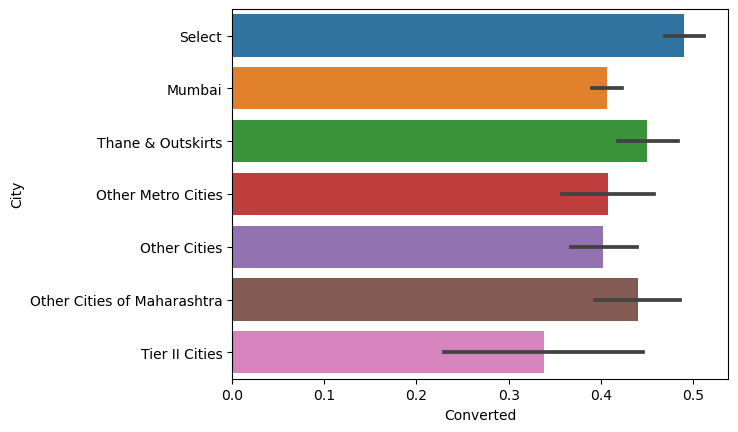

In [8]:
#Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value .

Leads['City'].value_counts()
sns.barplot(y='City', x='Converted', data=Leads)

<AxesSubplot:xlabel='Converted', ylabel='City'>

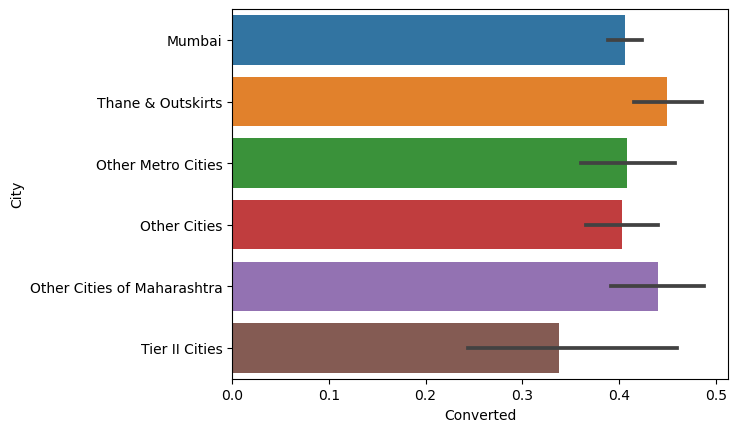

In [9]:
#Replacing all 'Select' with 'nan' which is in numpy library

Leads=Leads.replace('Select',np.nan)

#plot just for reference
sns.barplot(y='City', x='Converted', data=Leads)

In [10]:
#Percentage of null values present in Data

round(Leads.isnull().mean()*100,2)



Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

## Handling missing Values

### Dropping all columns having missing values greater than 70%

In [11]:
#dropping columns that have more than 70% of missing values as deleting each row will result in loss of importamt data

Leads=Leads.drop(Leads.loc[:,round(Leads.isnull().mean()*100,2)>70],1)

In [12]:
round(Leads.isnull().mean()*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

### Country Column

Replacing Null values with "India"

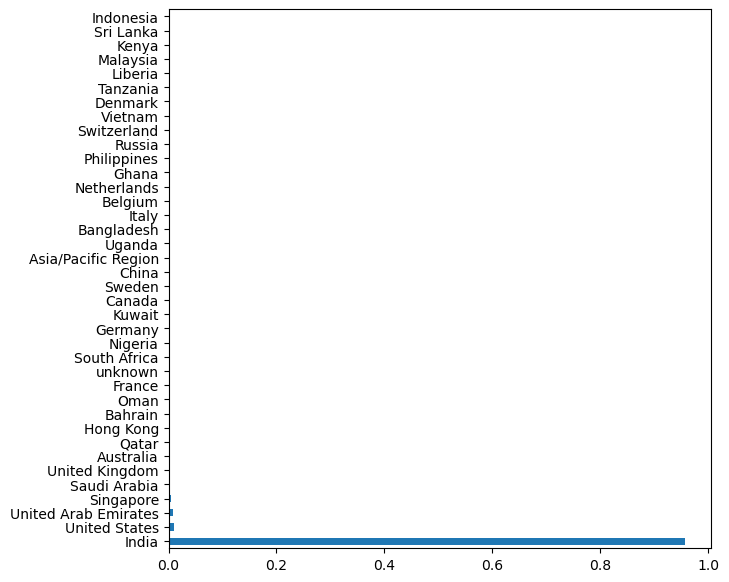

In [13]:
## As india has the highest number we are replacing missing values("2461") with India or mode values "India====6492"
plt.figure(figsize=[7,7])
Leads.Country.value_counts(normalize=True).plot.barh()
Leads.Country.isnull().sum()
Leads.Country=Leads.Country.replace(np.nan,"India")


### Specialization

Replacing Null values with "Others" as this is categorical variable and replacing it with Finicial management is not a good choice

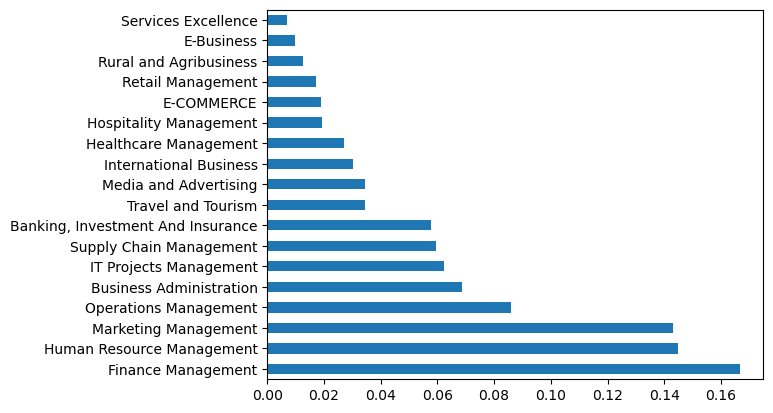

In [14]:
#Leads.Specialization.describe()
Leads.Specialization.value_counts(normalize=True).plot.barh()
#Leads.Specialization.isnull().sum()
Leads.Specialization=Leads.Specialization.replace(np.nan,"Others")


### Lead Quality

Replacing null vales with "Unknown"

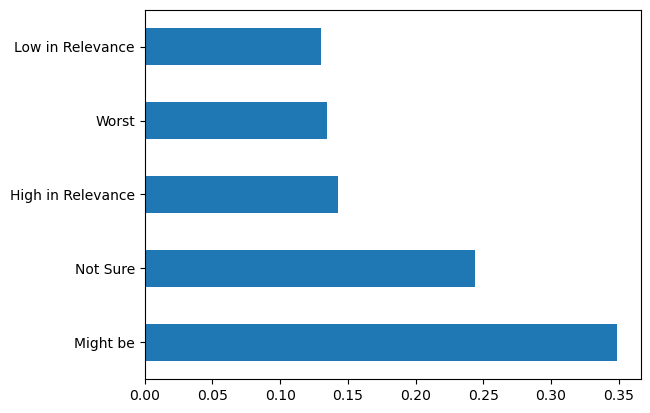

In [15]:
#Leads["Lead Quality"].describe()
#Leads["Lead Quality"].isnull().sum()
Leads["Lead Quality"].value_counts(normalize=True).plot.barh()
Leads["Lead Quality"]=Leads["Lead Quality"].replace(np.nan,"Unknown")


### Asymmetrique Columns
 Asymmetrique Activity Index: Converted null to "Unknown"
 
 Asymmetrique Profile Index:Converted null to "Unknown"
 
 Asymmetrique Activity Score: Deleted 
 
 Asymmetrique Profile Score : Deleted 



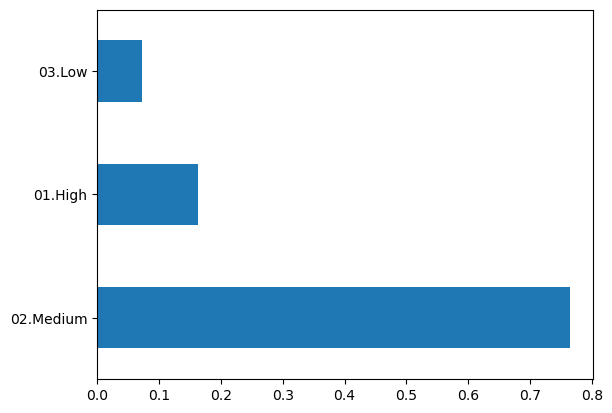

In [16]:
Leads["Asymmetrique Activity Index"].value_counts(normalize=True).plot.barh()
Leads["Asymmetrique Activity Index"]=Leads["Asymmetrique Activity Index"].replace(np.nan,"Unknown")


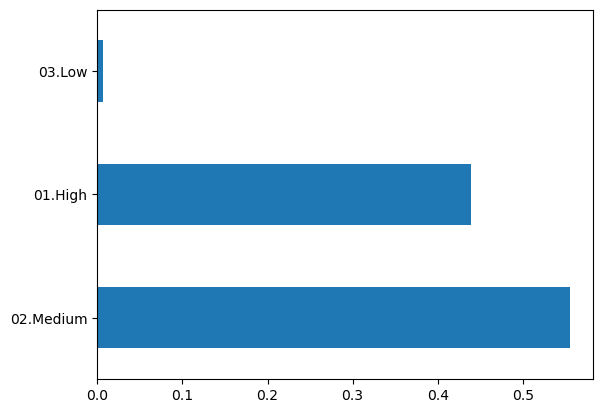

In [17]:
Leads["Asymmetrique Profile Index"].value_counts(normalize=True).plot.barh()
Leads["Asymmetrique Profile Index"]=Leads["Asymmetrique Profile Index"].replace(np.nan,"Unknown")


In [18]:
Leads=Leads.drop("Asymmetrique Activity Score",axis=1)
Leads=Leads.drop("Asymmetrique Profile Score",axis=1)

In [19]:
Leads.shape

(9240, 33)

### City Column

Replacing Null with "Mumbai"

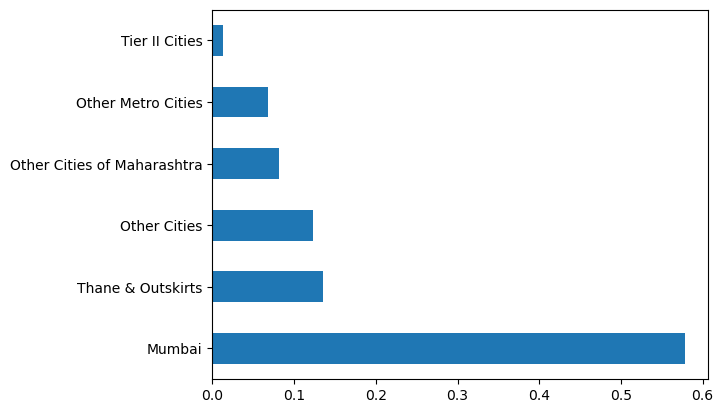

In [20]:
Leads.City.value_counts(normalize=True).plot.barh()
Leads.City=Leads.City.replace(np.nan,"Mumbai")


### Tags column 

Replacing with "Will revert after reading the email "

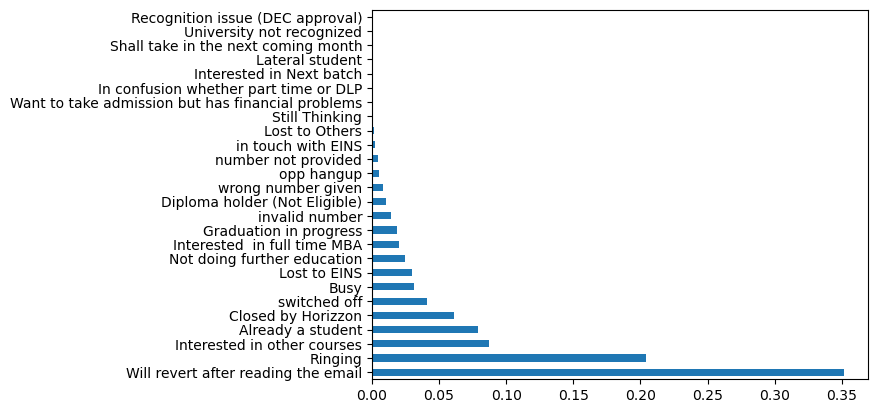

In [21]:
#Leads.Tags.isnull().sum()     #3353
Leads.Tags.value_counts(normalize=True).plot.barh()
Leads.Tags=Leads.Tags.replace(np.nan,"Will revert after reading the email")



###  What is your current occupation 

Replacing null vales with "Unemployed"

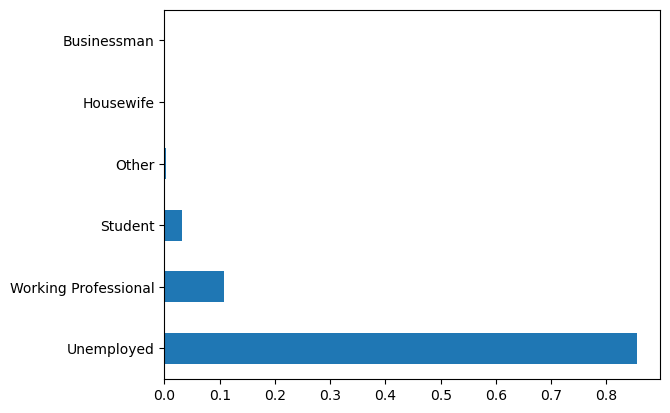

In [22]:
Leads["What is your current occupation"].value_counts(normalize=True).plot.barh()
Leads["What is your current occupation"]=Leads["What is your current occupation"].replace(np.nan,"Unemployed")

### What matters most to you in choosing a course 

Replacing Null with "Better Career Prospects"

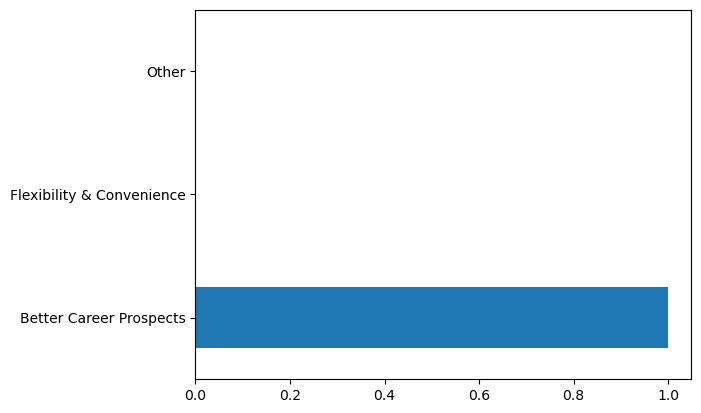

In [23]:
Leads['What matters most to you in choosing a course'].value_counts(normalize=True).plot.barh()
Leads['What matters most to you in choosing a course']=Leads['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

#### Now we have only 3 colums that has missing values less than 2%. 

Hence we can drop these null rows:

1. TotalVisits :1.48%

2. Page Views Per Visit : 1.48%

3. Last Activity : 1.11%


In [24]:
Leads.dropna(inplace=True)
Leads.isnull().sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                      

# 3. EDA


## 1. Univariate Analysis

Using targeted variable for the same i.e. Converted


    1. Lead Origin
    
    2. Lead Source
    
    3. Do Not Email  Do Not Call
    
    4. TotalVisits
    
    5. Total Time Spent on Website                    
                                
    6. Country  
    
    7. City
    
    8. hat is your current occupation 
    
    9. Lead Quality 
    
    10.Tags
    
##### Note: Using only 10 variables for Univariate Analysis


In [25]:
#Average people converted
Leads.Converted.mean()*100

37.85541106458012

### a. Lead Origin

#### Inferences
1. Landing page submission and API plays a mojor role in converstionof leads to hot leads or not
2. However Lead add for gives a positive output when it comes to more converion to hot lead as compared to poor leads

(array([0, 1, 2, 3]),
 [Text(0, 0, 'API'),
  Text(1, 0, 'Landing Page Submission'),
  Text(2, 0, 'Lead Add Form'),
  Text(3, 0, 'Lead Import')])

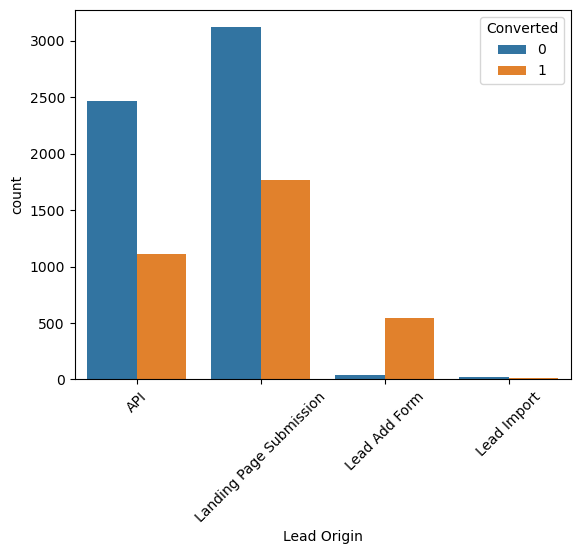

In [26]:

sns.countplot(x='Lead Origin',hue='Converted',data=Leads)
xticks(rotation=45)

### b. Lead Source

#### Inferences
1. "Google" and "Direct traffic" have almost same amount of non converted customers.Also they have highnumber of hot leads.
2. However "Reference" plays a major role in providing more hotleads if compared with the poor leads.The hot leads percetage is more in "Reference" if compared with hot leads in "Reference" section.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Organic Search'),
  Text(2, 0, 'Direct Traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Reference'),
  Text(6, 0, 'google'),
  Text(7, 0, 'Welingak Website'),
  Text(8, 0, 'Facebook'),
  Text(9, 0, 'blog'),
  Text(10, 0, 'Pay per Click Ads'),
  Text(11, 0, 'bing'),
  Text(12, 0, 'Social Media'),
  Text(13, 0, 'WeLearn'),
  Text(14, 0, 'Click2call'),
  Text(15, 0, 'Live Chat'),
  Text(16, 0, 'welearnblog_Home'),
  Text(17, 0, 'youtubechannel'),
  Text(18, 0, 'testone'),
  Text(19, 0, 'Press_Release'),
  Text(20, 0, 'NC_EDM')])

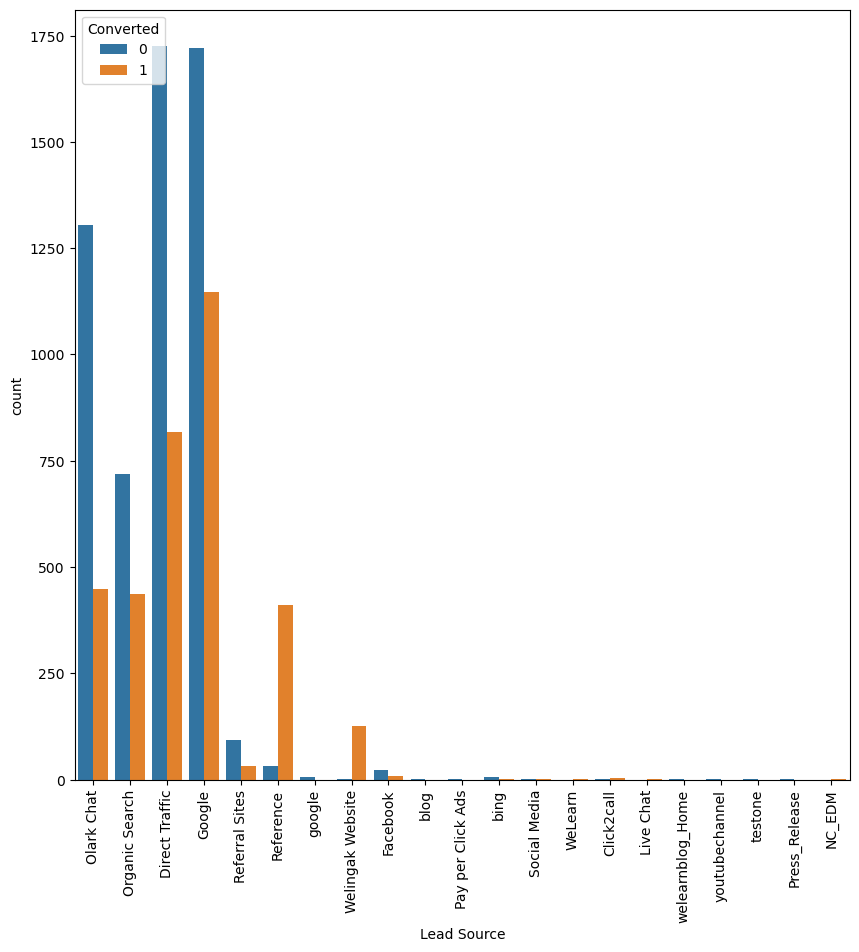

In [27]:
plt.figure(figsize=[10,10])
sns.countplot(x='Lead Source',hue='Converted',data=Leads)
xticks(rotation=90)

### c. Do Not Email and Do Not Call

#### Inferences
1. Seems like most of the peole are subscribe for mail and call services and there people can be considered as Hot leads .
2. Those people who dont want to persue this education do not want any sort of call or email realted to this.


<AxesSubplot:xlabel='Do Not Call', ylabel='count'>

<Figure size 2000x2000 with 0 Axes>

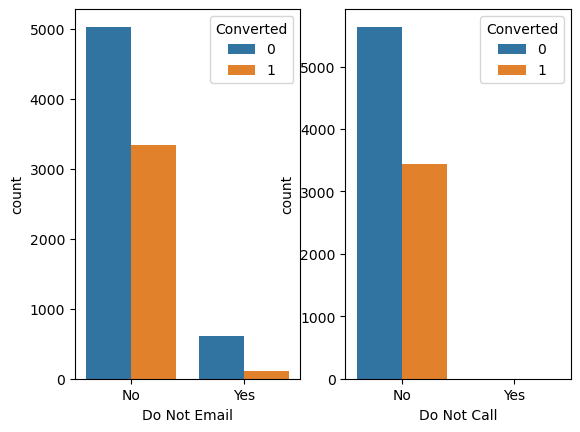

In [28]:
plt.figure(figsize=[20,20])
fig,axs=plt.subplots(1,2)
sns.countplot(x='Do Not Email',hue='Converted',data=Leads,ax=axs[0])
sns.countplot(x='Do Not Call',hue='Converted',data=Leads,ax=axs[1])


### d. TotalVisits

#### Inferences

1. As per the Boxplot people who have visit more as likely to get converted into a Hot leads.


<AxesSubplot:xlabel='Converted', ylabel='TotalVisits'>

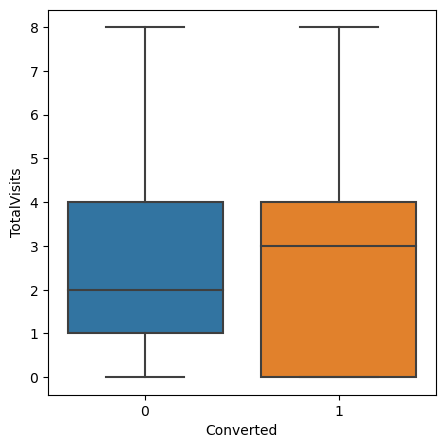

In [30]:
#as this is numeric variable so first we will check the statistical parameters

Leads.TotalVisits.describe(percentiles=[0.25,0.75,0.95,0.99,1.00])

#Seems lie after 95% values are increasing and reach highest at 100%,
#Hence we will remove 99 and 100th percentiles from the data

Leads.drop(Leads[Leads.TotalVisits > np.percentile(Leads.TotalVisits,95)].index, inplace = True)
Leads.TotalVisits.describe()
plt.figure(figsize=[5,5])
sns.boxplot(y='TotalVisits',x="Converted",data=Leads)


### d. Total Time Spent on Website 

#### Inferences

1. Leads spending more time on the website are most ;likely to get converted into Hot leads


<AxesSubplot:xlabel='Converted', ylabel='Total Time Spent on Website'>

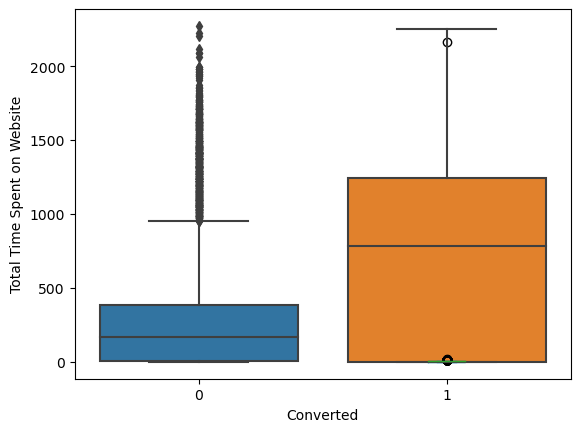

In [31]:
#Leads['Total Time Spent on Website'].describe(percentiles=[0.25,0.30,0.35,0.40,0.45,0.50,0.60,0.70,0.75,0.90,0.95,0.99])
Leads['Total Time Spent on Website'].value_counts().plot.box()
sns.boxplot(y='Total Time Spent on Website',x="Converted",data=Leads)

### e. Country

#### Inferences:

1. India is most likely to get converted as compared to other countries.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 [Text(0, 0, 'India'),
  Text(1, 0, 'Russia'),
  Text(2, 0, 'Kuwait'),
  Text(3, 0, 'Oman'),
  Text(4, 0, 'United Arab Emirates'),
  Text(5, 0, 'United States'),
  Text(6, 0, 'Australia'),
  Text(7, 0, 'United Kingdom'),
  Text(8, 0, 'Bahrain'),
  Text(9, 0, 'Ghana'),
  Text(10, 0, 'Singapore'),
  Text(11, 0, 'Qatar'),
  Text(12, 0, 'Saudi Arabia'),
  Text(13, 0, 'Belgium'),
  Text(14, 0, 'France'),
  Text(15, 0, 'Sri Lanka'),
  Text(16, 0, 'China'),
  Text(17, 0, 'Canada'),
  Text(18, 0, 'Sweden'),
  Text(19, 0, 'Nigeria'),
  Text(20, 0, 'Hong Kong'),
  Text(21, 0, 'Asia/Pacific Region'),
  Text(22, 0, 'Uganda'),
  Text(23, 0, 'Germany'),
  Text(24, 0, 'Kenya'),
  Text(25, 0, 'Italy'),
  Text(26, 0, 'South Africa'),
  Text(27, 0, 'Tanzania'),
  Text(28, 0, 'unknown'),
  Text(29, 0, 'Malaysia'),
  Text(30, 0, '

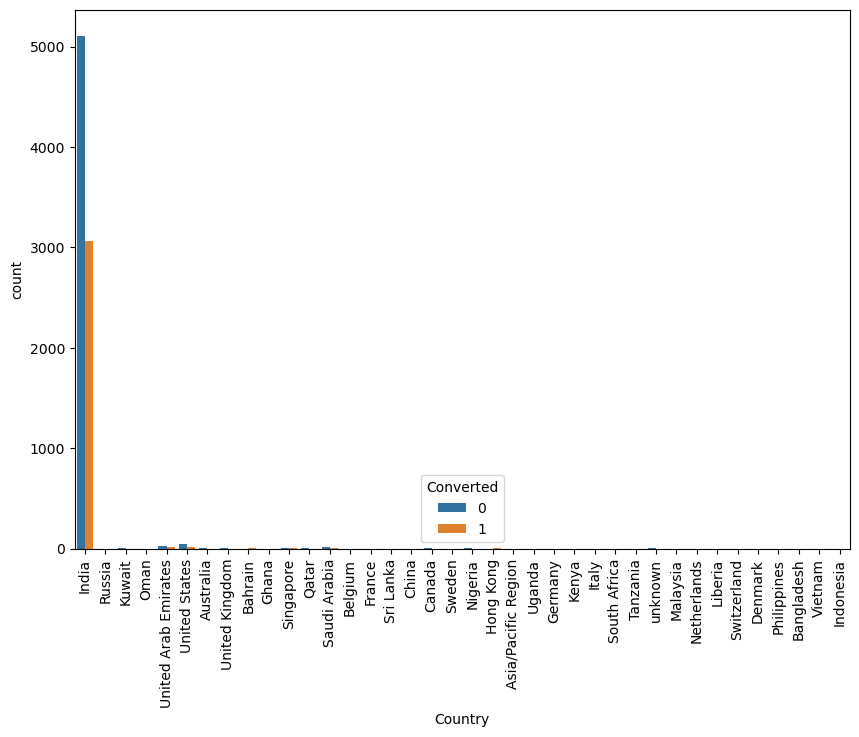

In [32]:
plt.figure(figsize=[10,7])
sns.countplot(x="Country",hue="Converted",data=Leads)
xticks(rotation=90)

### f. City

#### Inferences

1. In India Mumbai is most likely to show intrest in X education and get converted.

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Mumbai'),
  Text(1, 0, 'Thane & Outskirts'),
  Text(2, 0, 'Other Metro Cities'),
  Text(3, 0, 'Other Cities'),
  Text(4, 0, 'Other Cities of Maharashtra'),
  Text(5, 0, 'Tier II Cities')])

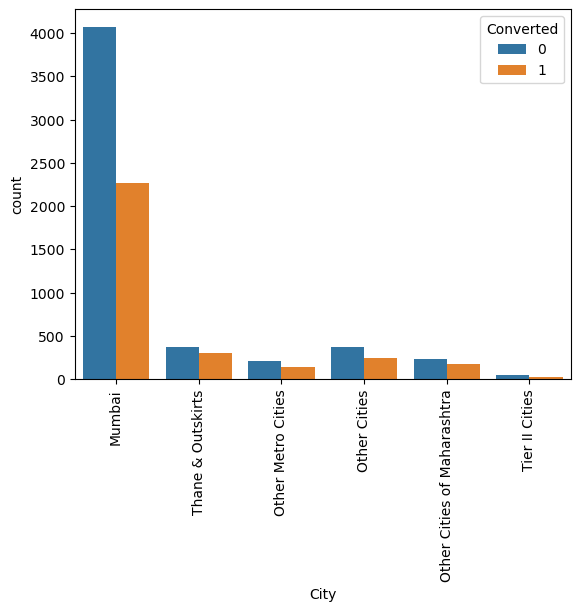

In [33]:
sns.countplot(x="City",hue="Converted",data=Leads)
xticks(rotation=90)

### g. What is your current occupation 

#### Inferences: 
1. Unemployed people are most likely to get converted as compared to others.

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Unemployed'),
  Text(1, 0, 'Student'),
  Text(2, 0, 'Working Professional'),
  Text(3, 0, 'Businessman'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Housewife')])

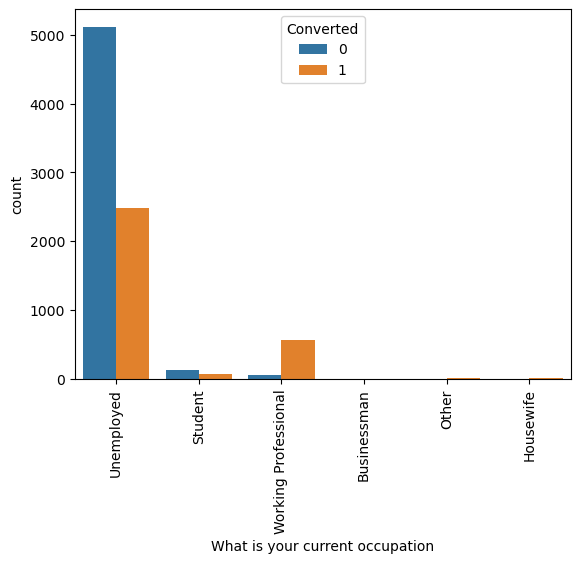

In [34]:
sns.countplot(x="What is your current occupation",hue="Converted",data=Leads)
xticks(rotation=90)

### h. Lead Quality

#### Inferences

1. "Unknown" Quality is more likely to get converted or apart from "Unknown" ,"Might be" is more likely to get converted.


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Low in Relevance'),
  Text(1, 0, 'Unknown'),
  Text(2, 0, 'Might be'),
  Text(3, 0, 'Not Sure'),
  Text(4, 0, 'Worst'),
  Text(5, 0, 'High in Relevance')])

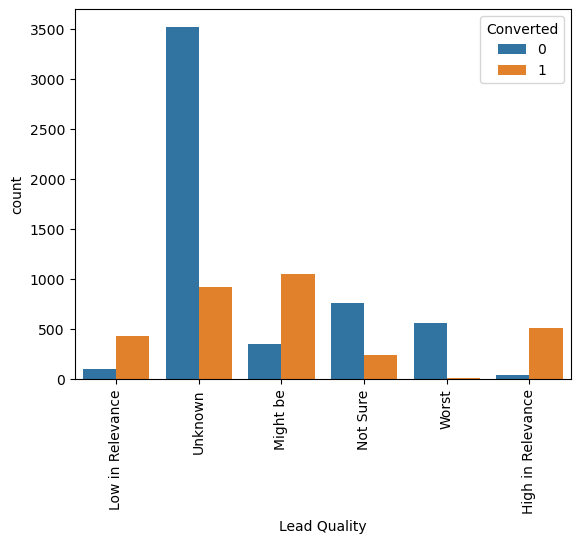

In [35]:
sns.countplot(x="Lead Quality",hue="Converted",data=Leads)
xticks(rotation=90)

### i. Tags

#### Inferences

1. Will revert after redaing the email ar mots likely to get converted

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'Interested in other courses'),
  Text(1, 0, 'Ringing'),
  Text(2, 0, 'Will revert after reading the email'),
  Text(3, 0, 'Lost to EINS'),
  Text(4, 0, 'In confusion whether part time or DLP'),
  Text(5, 0, 'Busy'),
  Text(6, 0, 'switched off'),
  Text(7, 0, 'in touch with EINS'),
  Text(8, 0, 'Already a student'),
  Text(9, 0, 'Diploma holder (Not Eligible)'),
  Text(10, 0, 'number not provided'),
  Text(11, 0, 'opp hangup'),
  Text(12, 0, 'Closed by Horizzon'),
  Text(13, 0, 'Graduation in progress'),
  Text(14, 0, 'Not doing further education'),
  Text(15, 0, 'invalid number'),
  Text(16, 0, 'wrong number given'),
  Text(17, 0, 'Interested  in full time MBA'),
  Text(18, 0, 'Still Thinking'),
  Text(19, 0, 'Lost to Others'),
  Text(20, 0, 'Shall take in the next coming month'),
  Text(21, 0, 'Lateral student'),
  Text(22, 0, 'Interested in Next batc

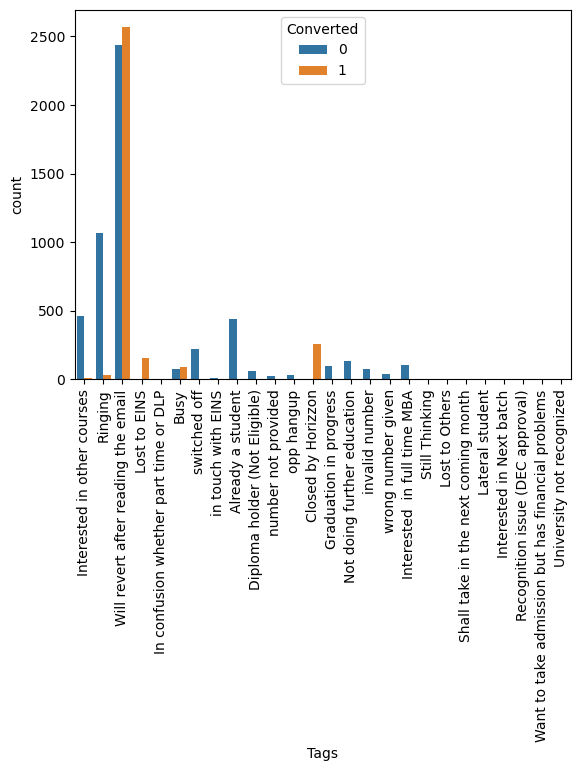

In [36]:
sns.countplot(x="Tags",hue="Converted",data=Leads)
xticks(rotation=90)

## 2.Data Preparation

### a. Converting YES/NO to Binaray 0/1

In [37]:

Col=['Do Not Email','Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
     'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
    'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
    'A free copy of Mastering The Interview']

def Converting_Binary(x):
    return x.map({'yes':1,'Yes':1,'YES':1,'no':0,'No':0,'NO':0})

Leads[Col]=Leads[Col].apply(Converting_Binary)

### b. For categorical Creating DUMMIES

In [38]:
Dummy=pd.get_dummies(Leads[['Country','City','Specialization','Lead Origin','Lead Source',
                            'Last Activity','What is your current occupation','What matters most to you in choosing a course',
                           'Tags','Lead Quality','Last Notable Activity','Asymmetrique Activity Index',
                            'Asymmetrique Profile Index']],drop_first=True)


In [39]:

Dummy = Dummy.drop(['Asymmetrique Profile Index_Unknown'], 1)
Dummy = Dummy.drop(['Asymmetrique Activity Index_Unknown'], 1)
Dummy = Dummy.drop(['Lead Quality_Unknown'], 1)


In [40]:
Leads=pd.concat([Leads,Dummy],axis=1)

In [41]:
Leads.shape

(8443, 187)

#### Deleting Original variables of which Dummies are created

In [42]:
Leads=Leads.drop(['Country','City','Specialization','Lead Origin','Lead Source',
                            'Last Activity','What is your current occupation','What matters most to you in choosing a course',
                           'Tags','Lead Quality','Last Notable Activity','Asymmetrique Activity Index',
                            'Asymmetrique Profile Index'],1)

Leads.head()

,Prospect ID,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,...,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Asymmetrique Activity Index_02.Medium,Asymmetrique Activity Index_03.Low,Asymmetrique Profile Index_02.Medium,Asymmetrique Profile Index_03.Low
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0,0.0,0,0.0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,0,5.0,674,2.5,0,0,...,0,0,0,0,0,0,1,0,1,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,0,1,2.0,1532,2.0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,0,1.0,305,1.0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,0,1,2.0,1428,1.0,0,0,...,0,0,0,0,0,0,1,0,0,0


## 3. Train Test split

In [78]:
from sklearn.model_selection import train_test_split

#create x: featurevariable
#create y: Response variable

X=Leads.drop(['Converted','Prospect ID'],axis=1)
X.info()
y=Leads.Converted


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8443 entries, 0 to 9239
Columns: 172 entries, Lead Number to Asymmetrique Profile Index_03.Low
dtypes: float64(2), int64(16), uint8(154)
memory usage: 2.5 MB


In [79]:
#model is broken into 70 : 30 ration

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=0)
X_train.shape

(5910, 172)

In [80]:
from sklearn.preprocessing import StandardScaler

Scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = Scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.shape

(5910, 172)

In [81]:
import statsmodels.api as sm

#X_train_sm=sm.add_constant(X_train)
Model_1=sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
Model_1.fit().summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5910
Model:                            GLM   Df Residuals:                     5755
Model Family:                Binomial   Df Model:                          154
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1526.8
Date:                Tue, 03 Jan 2023   Deviance:                       2556.9
Time:                        17:29:06   Pearson chi2:                 4.50e+15
No. Iterations:                    24   Pseudo R-squ. (CS):             0.5517
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                    -270.3492    1.9e+05     -0.001      0.999   -3.72e+05    3.72e+05
Lead Number                                                              2.052e-06   2.46e-06      0.833      0.405   -2.77e-06    6.88e-06
Do Not Email                                                               -0.7310      0.316     -2.315      0.021      -1.350      -0.112
Do Not Call                                                                17.7631   2.15e+05   8.27e-05      1.000   -4.21e+05    4.21e+05
TotalVisits                                                                 0.0610      0.105      0.582      0.560      -0.144       0.266
Total Time Spent on Website                                                 1.0566      0.062     16.954      0.000       0.934       1.179
Page Views Per Visit                                                       -0.1510      0.100     -1.517      0.129      -0.346       0.044
Search                                                                      1.1649      1.579      0.738      0.461      -1.929       4.259
Magazine                                                                 4.304e-07      0.016   2.67e-05      1.000      -0.032       0.032
Newspaper Article                                                       -6.879e-07      0.026  -2.64e-05      1.000      -0.051       0.051
X Education Forums                                                      -9.559e-07      0.036  -2.67e-05      1.000      -0.070       0.070
Newspaper                                                               -8.515e-07      0.032  -2.63e-05      1.000      -0.063       0.063
Digital Advertisement                                                     1.53e-07      0.006   2.69e-05      1.000      -0.011       0.011
Through Recommendations                                                    -0.0422      9.703     -0.004      0.997     -19.059      18.974
Receive More Updates About Our Courses                                   9.478e-07      0.036   2.65e-05      1.000      -0.070       0.070
Update me on Supply Chain Content                                        6.652e-07      0.025   2.68e-05      1.000      -0.049       0.049
Get updates on DM Content                                               -9.274e-08      0.003  -2.65e-05      1.000      -0.007       0.007
I agree to pay the amount through cheque                                -7.662e-08      0.003  -2.76e-05      1.000      -0.005       0.005
A free copy of Mastering The Interview                                     -0.3185      0.187     -1.699      0.089      -0.686       0.049
Cou

In [82]:
#Feature selection usng RFE

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(estimator=logreg,n_features_to_select=15)

rfe = rfe.fit(X_train, y_train)

In [53]:
list(zip(X_train,rfe.support_,rfe.ranking_))

[('Lead Number', True, 1),
 ('Do Not Email', False, 12),
 ('Do Not Call', False, 110),
 ('TotalVisits', False, 18),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 30),
 ('Search', False, 142),
 ('Magazine', False, 144),
 ('Newspaper Article', False, 148),
 ('X Education Forums', False, 150),
 ('Newspaper', False, 156),
 ('Digital Advertisement', False, 157),
 ('Through Recommendations', False, 139),
 ('Receive More Updates About Our Courses', False, 152),
 ('Update me on Supply Chain Content', False, 154),
 ('Get updates on DM Content', False, 155),
 ('I agree to pay the amount through cheque', False, 146),
 ('A free copy of Mastering The Interview', False, 9),
 ('Country_Australia', False, 135),
 ('Country_Bahrain', False, 84),
 ('Country_Bangladesh', False, 118),
 ('Country_Belgium', False, 100),
 ('Country_Canada', False, 97),
 ('Country_China', False, 99),
 ('Country_Denmark', False, 112),
 ('Country_France', False, 83),
 ('Country_Germany', False, 151)

In [83]:
col=X_train.columns[rfe.support_]
col

#X_train.columns[~rfe.support_]

Index(['Lead Number', 'Total Time Spent on Website', 'Country_India',
       'Specialization_Others', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Last Activity_Olark Chat Conversation',
       'Last Activity_SMS Sent', 'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Lead Quality_Might be',
       'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [84]:
import statsmodels.api as sm
X_train_sm=sm.add_constant(X_train[col])
Model_2=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
Model_2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5910
Model:                            GLM   Df Residuals:                     5894
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1962.2
Date:                Tue, 03 Jan 2023   Deviance:                       3924.5
Time:                        17:29:21   Pearson chi2:                 8.17e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4805
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9651      1.137     -1.729      0.084      -4.193       0.263
Lead Number                                           2.077e-06   1.77e-06      1.175      0.240   -1.39e-06    5.54e-06
Total Time Spent on Website                              0.9799      0.043     22.823      0.000       0.896       1.064
Country_India                                            0.4137      0.222      1.868      0.062      -0.020       0.848
Specialization_Others                                   -1.1707      0.144     -8.112      0.000      -1.454      -0.888
Lead Origin_Landing Page Submission                     -1.3933      0.142     -9.817      0.000      -1.671      -1.115
Lead Origin_Lead Add Form                                3.9206      0.260     15.081      0.000       3.411       4.430
Last Activity_Olark Chat Conversation                   -1.0439      0.187     -5.594      0.000      -1.410      -0.678
Last Activity_SMS Sent                                   0.4669      0.169      2.765      0.006       0.136       0.798
What is your current occupation_Unemployed              -0.4126      0.264     -1.560      0.119      -0.931       0.106
What is your current occupation_Working Professional     1.6973      0.334      5.083      0.000       1.043       2.352
Tags_Ringing                                            -3.4112      0.269    -12.702      0.000      -3.938      -2.885
Tags_Will revert after reading the email                 1.2383      0.096     12.905      0.000       1.050       1.426
Lead Quality_Might be                                    1.4307      0.129     11.049      0.000       1.177       1.685
Last Notable Activity_Modified                          -0.7215      0.104     -6.913      0.000      -0.926      -0.517
Last Notable Activity_SMS Sent                           1.2448      0.201      6.194      0.000       0.851       1.639
========================================================================================================================
"""

In [85]:
col=col.drop('Specialization_Others',1)

In [86]:

X_train_sm=sm.add_constant(X_train[col])
Model_3=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=Model_3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5910
Model:                            GLM   Df Residuals:                     5895
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1996.6
Date:                Tue, 03 Jan 2023   Deviance:                       3993.3
Time:                        17:29:32   Pearson chi2:                 8.14e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4744
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.8355      1.120     -2.533      0.011      -5.030      -0.641
Lead Number                                           2.077e-06   1.75e-06      1.188      0.235   -1.35e-06     5.5e-06
Total Time Spent on Website                              1.0120      0.043     23.746      0.000       0.928       1.095
Country_India                                            0.4118      0.223      1.850      0.064      -0.025       0.848
Lead Origin_Landing Page Submission                     -0.5202      0.089     -5.829      0.000      -0.695      -0.345
Lead Origin_Lead Add Form                                4.1605      0.252     16.509      0.000       3.667       4.654
Last Activity_Olark Chat Conversation                   -1.1259      0.182     -6.180      0.000      -1.483      -0.769
Last Activity_SMS Sent                                   0.4545      0.168      2.701      0.007       0.125       0.784
What is your current occupation_Unemployed              -0.4104      0.254     -1.613      0.107      -0.909       0.088
What is your current occupation_Working Professional     1.9037      0.323      5.898      0.000       1.271       2.536
Tags_Ringing                                            -3.5322      0.273    -12.961      0.000      -4.066      -2.998
Tags_Will revert after reading the email                 1.1736      0.095     12.353      0.000       0.987       1.360
Lead Quality_Might be                                    1.4867      0.129     11.525      0.000       1.234       1.740
Last Notable Activity_Modified                          -0.7464      0.103     -7.256      0.000      -0.948      -0.545
Last Notable Activity_SMS Sent                           1.2252      0.200      6.128      0.000       0.833       1.617
========================================================================================================================
"""

### Here model 3 looks good hence we are finalizing model 3 as the final model

In [87]:
#Geeting predicted values on train set

y_train_pv=res.predict(X_train_sm)
y_train_pv[:10]

# reshaping the array containing predicted values
y_train_pv = y_train_pv.values.reshape(-1)
y_train_pv[:10]

array([0.00115747, 0.10635844, 0.12256674, 0.21383748, 0.17725979,
       0.98201863, 0.54239263, 0.415193  , 0.91177601, 0.99977678])

### Creating a dataframe containing actual convert value and its predicted value

In [88]:
y_train_pv_final=pd.DataFrame({'Converted':y_train.values,'Conversion Predicted':y_train_pv})
y_train_pv_final['Lead ID']=y_train.index
y_train_pv_final.head(5)


,Converted,Conversion Predicted,Lead ID
0,0,0.001157,1497
1,0,0.106358,5445
2,0,0.122567,3096
3,0,0.213837,7553
4,0,0.177260,5104


### Creating a new variable called prediction and updating probability to ! if Conversion predicted is >0.5

In [89]:
y_train_pv_final["Prediction"]=y_train_pv_final['Conversion Predicted'].map(lambda x: 1 if x>0.5 else 0)
y_train_pv_final.head()

,Converted,Conversion Predicted,Lead ID,Prediction
0,0,0.001157,1497,0
1,0,0.106358,5445,0
2,0,0.122567,3096,0
3,0,0.213837,7553,0
4,0,0.177260,5104,0


#### Now to capture errors and to evaluate how well the model works we use CONFUSION MATRIX
#### And to check accuracy we will calculate ACCURACY SCORE

In [90]:
from sklearn import metrics

confusion=metrics.confusion_matrix(y_train_pv_final.Converted,y_train_pv_final.Prediction)
confusion

array([[3399,  319],
       [ 489, 1703]], dtype=int64)

In [91]:
accuracy=metrics.accuracy_score(y_train_pv_final.Converted,y_train_pv_final.Prediction)
accuracy

0.8632825719120135

### Checking VIF's

In [92]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['Features']=X_train[col].columns
vif['VIF']=[variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]

vif['VIF']=round(vif.VIF,2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
0,Lead Number,68.99
7,What is your current occupation_Unemployed,35.17
2,Country_India,29.23
13,Last Notable Activity_SMS Sent,6.25
6,Last Activity_SMS Sent,6.07
8,What is your current occupation_Working Profes...,3.99
10,Tags_Will revert after reading the email,3.51
3,Lead Origin_Landing Page Submission,2.78
12,Last Notable Activity_Modified,2.54
9,Tags_Ringing,1.60


In [93]:
# Deleting lead number as it shows high collinearity
col=col.drop("Lead Number",1)
col

Index(['Total Time Spent on Website', 'Country_India',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Lead Quality_Might be',
       'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent'],
      dtype='object')

### Rebuilduing Model with updated col,

### Model 3 with updated  VIF


In [94]:

X_train_sm=sm.add_constant(X_train[col])
Model_4=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=Model_4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5910
Model:                            GLM   Df Residuals:                     5896
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1997.3
Date:                Tue, 03 Jan 2023   Deviance:                       3994.7
Time:                        17:29:53   Pearson chi2:                 8.32e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4743
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.5703      0.343     -4.585      0.000      -2.242      -0.899
Total Time Spent on Website                              1.0145      0.043     23.819      0.000       0.931       1.098
Country_India                                            0.4188      0.223      1.881      0.060      -0.018       0.855
Lead Origin_Landing Page Submission                     -0.5258      0.089     -5.898      0.000      -0.700      -0.351
Lead Origin_Lead Add Form                                4.1699      0.252     16.566      0.000       3.677       4.663
Last Activity_Olark Chat Conversation                   -1.1265      0.182     -6.189      0.000      -1.483      -0.770
Last Activity_SMS Sent                                   0.4518      0.168      2.685      0.007       0.122       0.781
What is your current occupation_Unemployed              -0.3991      0.254     -1.572      0.116      -0.897       0.099
What is your current occupation_Working Professional     1.9084      0.323      5.917      0.000       1.276       2.541
Tags_Ringing                                            -3.5420      0.273    -12.979      0.000      -4.077      -3.007
Tags_Will revert after reading the email                 1.1817      0.095     12.469      0.000       0.996       1.367
Lead Quality_Might be                                    1.4960      0.129     11.623      0.000       1.244       1.748
Last Notable Activity_Modified                          -0.7454      0.103     -7.250      0.000      -0.947      -0.544
Last Notable Activity_SMS Sent                           1.2057      0.199      6.053      0.000       0.815       1.596
========================================================================================================================
"""

In [98]:
col=col.drop("What is your current occupation_Unemployed", 1)
col

Index(['Total Time Spent on Website', 'Country_India',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Working Professional', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Lead Quality_Might be',
       'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [99]:
col

Index(['Total Time Spent on Website', 'Country_India',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Working Professional', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Lead Quality_Might be',
       'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [100]:

X_train_sm=sm.add_constant(X_train[col])
Model_5=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=Model_5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5910
Model:                            GLM   Df Residuals:                     5897
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1998.6
Date:                Tue, 03 Jan 2023   Deviance:                       3997.1
Time:                        17:34:06   Pearson chi2:                 8.30e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4740
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9474      0.245     -7.964      0.000      -2.427      -1.468
Total Time Spent on Website                              1.0156      0.043     23.856      0.000       0.932       1.099
Country_India                                            0.4187      0.222      1.889      0.059      -0.016       0.853
Lead Origin_Landing Page Submission                     -0.5241      0.089     -5.882      0.000      -0.699      -0.349
Lead Origin_Lead Add Form                                4.1790      0.252     16.608      0.000       3.686       4.672
Last Activity_Olark Chat Conversation                   -1.1258      0.182     -6.185      0.000      -1.483      -0.769
Last Activity_SMS Sent                                   0.4414      0.168      2.626      0.009       0.112       0.771
What is your current occupation_Working Professional     2.2929      0.211     10.886      0.000       1.880       2.706
Tags_Ringing                                            -3.5608      0.273    -13.061      0.000      -4.095      -3.026
Tags_Will revert after reading the email                 1.1684      0.094     12.386      0.000       0.983       1.353
Lead Quality_Might be                                    1.5001      0.129     11.669      0.000       1.248       1.752
Last Notable Activity_Modified                          -0.7470      0.103     -7.268      0.000      -0.948      -0.546
Last Notable Activity_SMS Sent                           1.2066      0.199      6.059      0.000       0.816       1.597
========================================================================================================================
"""

In [101]:
#Geeting predicted values on train set

y_train_pv=res.predict(X_train_sm)
y_train_pv[:10]

# reshaping the array containing predicted values
y_train_pv = y_train_pv.values.reshape(-1)
y_train_pv[:10]

y_train_pv_final=pd.DataFrame({'Converted':y_train.values,'Conversion Predicted':y_train_pv})
y_train_pv_final['Lead ID']=y_train.index
y_train_pv_final.head(5)


y_train_pv_final["Prediction"]=y_train_pv_final['Conversion Predicted'].map(lambda x: 1 if x>0.5 else 0)
y_train_pv_final.head()

confusion=metrics.confusion_matrix(y_train_pv_final.Converted,y_train_pv_final.Prediction)
confusion

accuracy=metrics.accuracy_score(y_train_pv_final.Converted,y_train_pv_final.Prediction)
accuracy

vif=pd.DataFrame()
vif['Features']=X_train[col].columns
vif['VIF']=[variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]

vif['VIF']=round(vif.VIF,2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

col=col.drop("Country_India",1)
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Last Activity_Olark Chat Conversation',
       'Last Activity_SMS Sent',
       'What is your current occupation_Working Professional', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Lead Quality_Might be',
       'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [102]:

X_train_sm=sm.add_constant(X_train[col])
Model_6=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=Model_6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5910
Model:                            GLM   Df Residuals:                     5898
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2000.4
Date:                Tue, 03 Jan 2023   Deviance:                       4000.8
Time:                        17:34:24   Pearson chi2:                 8.33e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4737
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.5372      0.111    -13.882      0.000      -1.754      -1.320
Total Time Spent on Website                              1.0151      0.043     23.859      0.000       0.932       1.098
Lead Origin_Landing Page Submission                     -0.5372      0.089     -6.047      0.000      -0.711      -0.363
Lead Origin_Lead Add Form                                4.1826      0.251     16.631      0.000       3.690       4.675
Last Activity_Olark Chat Conversation                   -1.1203      0.182     -6.157      0.000      -1.477      -0.764
Last Activity_SMS Sent                                   0.4450      0.168      2.647      0.008       0.116       0.774
What is your current occupation_Working Professional     2.2803      0.211     10.821      0.000       1.867       2.693
Tags_Ringing                                            -3.5530      0.273    -13.019      0.000      -4.088      -3.018
Tags_Will revert after reading the email                 1.1712      0.094     12.418      0.000       0.986       1.356
Lead Quality_Might be                                    1.5022      0.128     11.694      0.000       1.250       1.754
Last Notable Activity_Modified                          -0.7505      0.103     -7.305      0.000      -0.952      -0.549
Last Notable Activity_SMS Sent                           1.1986      0.199      6.022      0.000       0.808       1.589
========================================================================================================================
"""

In [103]:
#Geeting predicted values on train set

y_train_pv=res.predict(X_train_sm)
y_train_pv[:10]

# reshaping the array containing predicted values
y_train_pv = y_train_pv.values.reshape(-1)
y_train_pv[:10]

y_train_pv_final=pd.DataFrame({'Converted':y_train.values,'Conversion Predicted':y_train_pv})
y_train_pv_final['Lead ID']=y_train.index
y_train_pv_final.head(5)


y_train_pv_final["Prediction"]=y_train_pv_final['Conversion Predicted'].map(lambda x: 1 if x>0.5 else 0)
y_train_pv_final.head()

confusion=metrics.confusion_matrix(y_train_pv_final.Converted,y_train_pv_final.Prediction)
confusion

accuracy=metrics.accuracy_score(y_train_pv_final.Converted,y_train_pv_final.Prediction)
accuracy

vif=pd.DataFrame()
vif['Features']=X_train[col].columns
vif['VIF']=[variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]

vif['VIF']=round(vif.VIF,2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

col=col.drop("Last Notable Activity_SMS Sent",1)
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Last Activity_Olark Chat Conversation',
       'Last Activity_SMS Sent',
       'What is your current occupation_Working Professional', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Lead Quality_Might be',
       'Last Notable Activity_Modified'],
      dtype='object')

In [104]:

X_train_sm=sm.add_constant(X_train[col])
Model_7=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=Model_7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5910
Model:                            GLM   Df Residuals:                     5899
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2019.0
Date:                Tue, 03 Jan 2023   Deviance:                       4038.1
Time:                        17:34:36   Pearson chi2:                 8.34e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4704
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.4024      0.107    -13.088      0.000      -1.612      -1.192
Total Time Spent on Website                              1.0134      0.042     23.879      0.000       0.930       1.097
Lead Origin_Landing Page Submission                     -0.5517      0.088     -6.256      0.000      -0.725      -0.379
Lead Origin_Lead Add Form                                4.1255      0.253     16.305      0.000       3.630       4.621
Last Activity_Olark Chat Conversation                   -0.9998      0.182     -5.505      0.000      -1.356      -0.644
Last Activity_SMS Sent                                   1.2911      0.090     14.301      0.000       1.114       1.468
What is your current occupation_Working Professional     2.2981      0.213     10.764      0.000       1.880       2.717
Tags_Ringing                                            -3.4531      0.269    -12.834      0.000      -3.980      -2.926
Tags_Will revert after reading the email                 1.1333      0.094     12.089      0.000       0.950       1.317
Lead Quality_Might be                                    1.5480      0.127     12.163      0.000       1.299       1.797
Last Notable Activity_Modified                          -1.0860      0.089    -12.233      0.000      -1.260      -0.912
========================================================================================================================
"""

In [106]:
#Geeting predicted values on train set

y_train_pv=res.predict(X_train_sm)
y_train_pv[:10]

# reshaping the array containing predicted values
y_train_pv = y_train_pv.values.reshape(-1)
y_train_pv[:10]

y_train_pv_final=pd.DataFrame({'Converted':y_train.values,'Conversion Predicted':y_train_pv})
y_train_pv_final['Lead ID']=y_train.index
y_train_pv_final.head(5)


y_train_pv_final["Prediction"]=y_train_pv_final['Conversion Predicted'].map(lambda x: 1 if x>0.5 else 0)
y_train_pv_final.head()

confusion=metrics.confusion_matrix(y_train_pv_final.Converted,y_train_pv_final.Prediction)
confusion

accuracy=metrics.accuracy_score(y_train_pv_final.Converted,y_train_pv_final.Prediction)
accuracy

vif=pd.DataFrame()
vif['Features']=X_train[col].columns
vif['VIF']=[variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]

vif['VIF']=round(vif.VIF,2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

#col=col.drop("Last Notable Activity_SMS Sent",1)
#col

,Features,VIF
7,Tags_Will revert after reading the email,2.00
1,Lead Origin_Landing Page Submission,1.96
4,Last Activity_SMS Sent,1.70
9,Last Notable Activity_Modified,1.61
8,Lead Quality_Might be,1.54
3,Last Activity_Olark Chat Conversation,1.41
5,What is your current occupation_Working Profes...,1.28
6,Tags_Ringing,1.28
2,Lead Origin_Lead Add Form,1.26
0,Total Time Spent on Website,1.18


# Model 7 looks good with less or no multicollinearity and p value less than 0.5.

## However Elimination of columns also depends on business.If any column is important for business then we cannot remove that even if it has high VIF.

### But for now let say Model & is the final one.


## Plotting heat map for the final model

<AxesSubplot:>

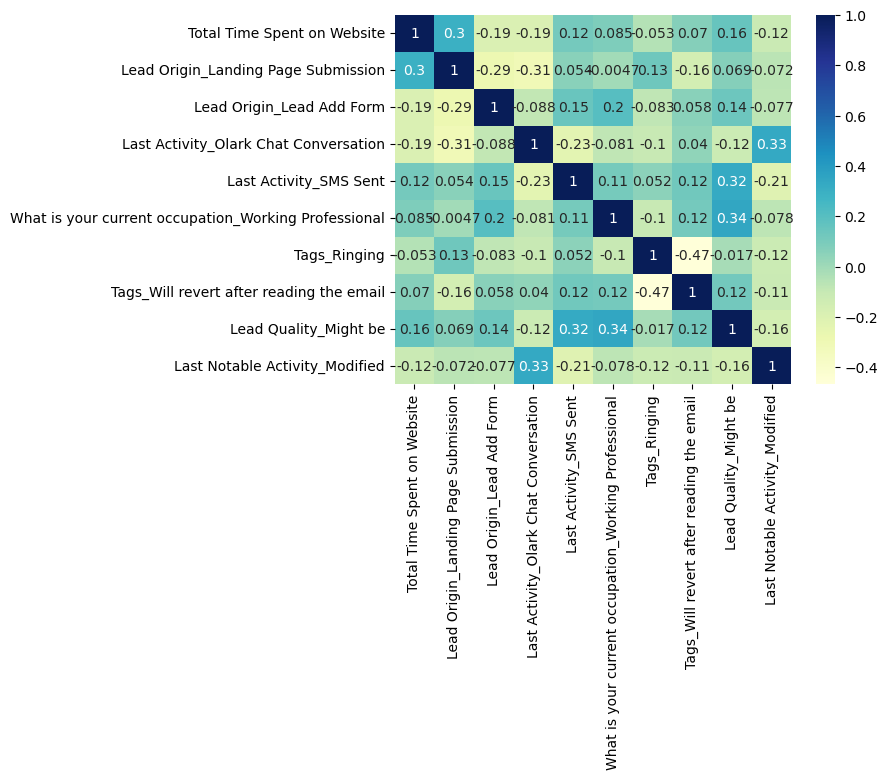

In [107]:

corr = X_train[col].corr()
sns.heatmap(corr, annot=True, cmap="YlGnBu")

## Calculating metrices beyound accuracy

1. Sensitivity and specificity
2. +ve predicted value
3. -ve predicted value


In [108]:
confusion=metrics.confusion_matrix(y_train_pv_final.Converted,y_train_pv_final.Prediction)
confusion

array([[3405,  313],
       [ 487, 1705]], dtype=int64)

In [109]:
accuracy=metrics.accuracy_score(y_train_pv_final.Converted,y_train_pv_final.Prediction)
accuracy

0.8646362098138748

In [110]:
#Metrices beyond accuracy

TP=confusion[1,1]
TN=confusion[0,0]
FP=confusion[0,1]
FN=confusion[1,0]

Sensitivity=TP/float(TP+FN)
Specificity=TN/float(TN+FP)
Positive_Predictive=TP/float(TP+FP)
Negative_predictive=TN/float(TN+FN)

print(Sensitivity)
print(Specificity)
print(Positive_Predictive)
print(Negative_predictive)


0.7778284671532847
0.9158149542764927
0.8448959365708623
0.8748715313463515


## Plotting ROC curve

In [111]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(10,10))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return None

In [112]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pv_final.Converted, y_train_pv_final['Conversion Predicted'], drop_intermediate = False )

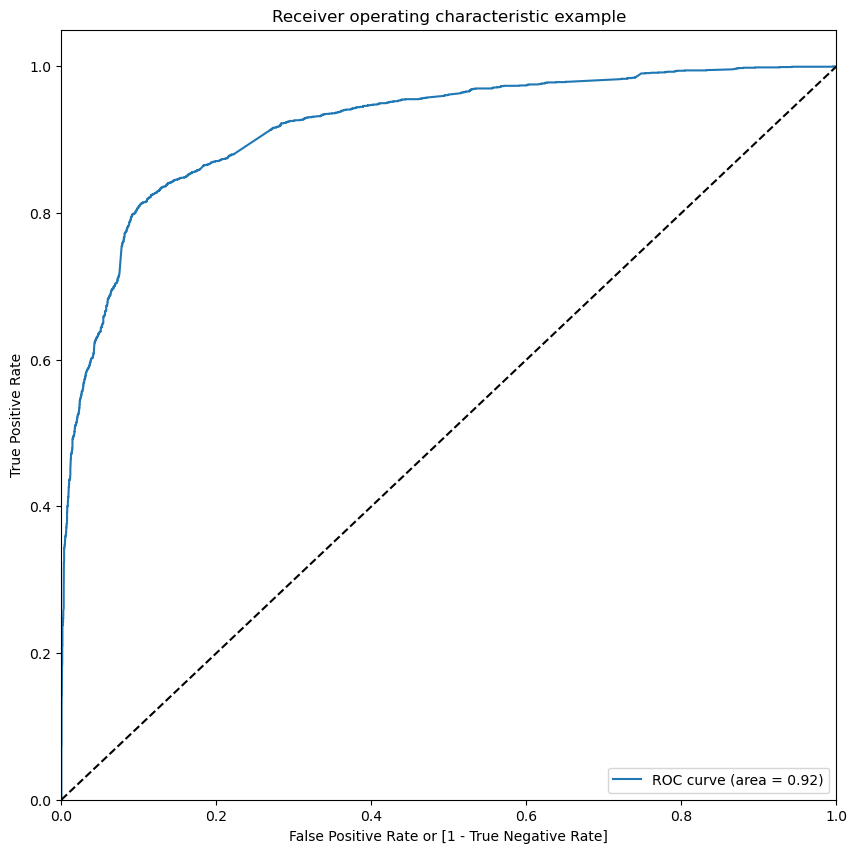

In [113]:
draw_roc(y_train_pv_final.Converted, y_train_pv_final["Conversion Predicted"])

## Finding optimal threshold

In [114]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pv_final[i]= y_train_pv_final['Conversion Predicted'].map(lambda x: 1 if x > i else 0)
y_train_pv_final.head()

,Converted,Conversion Predicted,Lead ID,Prediction,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.002008,1497,0,1,0,0,0,0,0,0,0,0,0
1,0,0.085329,5445,0,1,0,0,0,0,0,0,0,0,0
2,0,0.097379,3096,0,1,0,0,0,0,0,0,0,0,0
3,0,0.242190,7553,0,1,1,1,0,0,0,0,0,0,0
4,0,0.190799,5104,0,1,1,0,0,0,0,0,0,0,0


In [115]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df=pd.DataFrame(columns=['prob','accuracy','sensi','speci'])
num=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for i in num:
    conf=metrics.confusion_matrix(y_train_pv_final.Converted,y_train_pv_final[i])
    Total=sum(sum(conf))
    
    accuracy = (conf[0,0]+conf[1,1])/Total   #TN+TP/Total
    speci = conf[0,0]/(conf[0,0]+conf[0,1])  #TN/(TN+FP)
    sensi = conf[1,1]/(conf[1,0]+conf[1,1])  #TP/(TP+FN)
    
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.370897  1.000000  0.000000
0.1   0.1  0.689171  0.956661  0.531469
0.2   0.2  0.775127  0.930201  0.683701
0.3   0.3  0.841286  0.853102  0.834320
0.4   0.4  0.862437  0.821624  0.886498
0.5   0.5  0.864636  0.777828  0.915815
0.6   0.6  0.843316  0.678832  0.940290
0.7   0.7  0.828088  0.602190  0.961269
0.8   0.8  0.812690  0.534215  0.976869
0.9   0.9  0.772589  0.400547  0.991931


<AxesSubplot:xlabel='prob'>

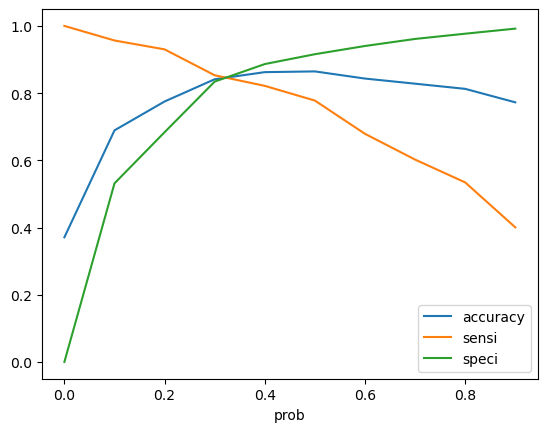

In [116]:
#Plotting Accuracy,sensitivity,specificity for various probabilities

cutoff_df.plot.line(x='prob',y=['accuracy','sensi','speci'])

## From above figure 0.35 can be considered as actual threshold hence updating the probalility again in the final data

In [117]:
y_train_pv_final["Final_Prediction"]=y_train_pv_final['Conversion Predicted'].map(lambda x:1 if x>0.35 else 0)
y_train_pv_final.head()

,Converted,Conversion Predicted,Lead ID,Prediction,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Prediction
0,0,0.002008,1497,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.085329,5445,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.097379,3096,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.242190,7553,0,1,1,1,0,0,0,0,0,0,0,0
4,0,0.190799,5104,0,1,1,0,0,0,0,0,0,0,0,0


In [118]:
# checking accuracy after updating cutoff

metrics.accuracy_score(y_train_pv_final.Converted,y_train_pv_final.Final_Prediction)

0.854653130287648

In [119]:
#Assigning Lead score

y_train_pv_final['Lead_Score'] = y_train_pv_final['Conversion Predicted'].map( lambda x: round(x*100))

y_train_pv_final.head(20)

,Converted,Conversion Predicted,Lead ID,Prediction,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Prediction,Lead_Score
0,0,0.002008,1497,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0.085329,5445,0,1,0,0,0,0,0,0,0,0,0,0,9
2,0,0.097379,3096,0,1,0,0,0,0,0,0,0,0,0,0,10
3,0,0.242190,7553,0,1,1,1,0,0,0,0,0,0,0,0,24
4,0,0.190799,5104,0,1,1,0,0,0,0,0,0,0,0,0,19
5,1,0.984065,4338,1,1,1,1,1,1,1,1,1,1,1,1,98
6,0,0.566153,1523,1,1,1,1,1,1,1,0,0,0,0,1,57
7,0,0.421487,279,0,1,1,1,1,1,0,0,0,0,0,1,42
8,1,0.949753,4062,1,1,1,1,1,1,1,1,1,1,1,1,95
9,1,0.999703,3723,1,1,1,1,1,1,1,1,1,1,1,1,100


### Precision score and recall score


In [120]:
from sklearn.metrics import precision_score,recall_score

precision=precision_score(y_train_pv_final.Converted,y_train_pv_final.Final_Prediction)
recall=recall_score(y_train_pv_final.Converted,y_train_pv_final.Final_Prediction)

print(precision)
print(recall)

0.7849508336896109
0.8375912408759124


## Precision and Recall tradeoff


In [121]:
from sklearn.metrics import precision_recall_curve

p,r,thresholds=precision_recall_curve(y_train_pv_final.Converted,y_train_pv_final['Conversion Predicted'])


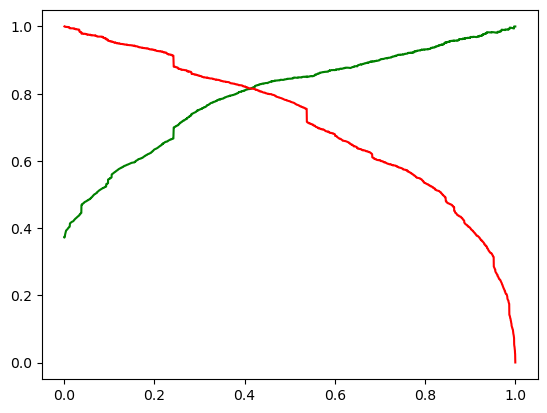

In [122]:
plt.plot(thresholds,p[:-1],"g-")
plt.plot(thresholds,r[:-1],"r-")
plt.show()

# MAKING PREDICTION ON TEST DATA

In [123]:
from sklearn.preprocessing import StandardScaler

Scaler = StandardScaler()

X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = Scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_test.shape

(2533, 172)

In [124]:
X_test=X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Working Professional,Tags_Ringing,Tags_Will revert after reading the email,Lead Quality_Might be,Last Notable Activity_Modified
644,-0.004285,1,0,0,0,0,0,1,1,1
5688,-0.864762,0,1,0,0,0,0,0,0,1
4070,-0.159244,1,0,0,0,0,0,0,0,0
2681,-0.864762,0,1,0,1,1,0,1,1,0
4863,1.685678,1,0,0,0,0,0,1,0,0


In [125]:
X_test_sm = sm.add_constant(X_test)

#Geeting predicted values on train set
y_test_pv=res.predict(X_test_sm)
y_test_pv[:10]
y_pred_pv_final = pd.DataFrame(y_test_pv)


In [126]:
y_test_df = pd.DataFrame(y_test)
y_test_df['Lead ID']=y_test_df.index


In [127]:
# Removing index for both dataframes to append them side by side 

y_pred_pv_final.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [128]:
# Appending y_test_df and y_pred_pv_final

y_test_FINAL = pd.concat([y_test_df, y_pred_pv_final],axis=1)
y_test_FINAL.head()

,Converted,Lead ID,0
0,1,644,0.410209
1,1,5688,0.681511
2,0,4070,0.107602
3,1,2681,0.999702
4,1,4863,0.708375


In [129]:
# Renaming the column 

y_test_FINAL= y_test_FINAL.rename(columns={ 0 : 'Converted_prob'})
y_test_FINAL.head()

,Converted,Lead ID,Converted_prob
0,1,644,0.410209
1,1,5688,0.681511
2,0,4070,0.107602
3,1,2681,0.999702
4,1,4863,0.708375


In [130]:
# Rearranging the columns
y_test_FINAL = y_test_FINAL.reindex(['Lead ID','Converted','Converted_prob'], axis=1)
y_test_FINAL.head()

,Lead ID,Converted,Converted_prob
0,644,1,0.410209
1,5688,1,0.681511
2,4070,0,0.107602
3,2681,1,0.999702
4,4863,1,0.708375


In [131]:
y_test_FINAL['Final_predicted'] = y_test_FINAL.Converted_prob.map(lambda x: 1 if x > 0.2 else 0)
y_test_FINAL.head()

,Lead ID,Converted,Converted_prob,Final_predicted
0,644,1,0.410209,1
1,5688,1,0.681511,1
2,4070,0,0.107602,0
3,2681,1,0.999702,1
4,4863,1,0.708375,1


In [133]:
#Checking accuracy in test data

acc=metrics.accuracy_score(y_test_FINAL.Converted,y_test_FINAL.Final_predicted)
acc

0.7670746150809317

In [134]:
conf=metrics.confusion_matrix(y_test_FINAL.Converted,y_test_FINAL.Final_predicted)
conf

array([[1087,  498],
       [  92,  856]], dtype=int64)

In [135]:
#Checking sensitivity and specificity
TP=conf[1,1]
TN=conf[0,0]
FP=conf[0,1]
FN=conf[1,0]

In [136]:
Sensi=TP/float(TP+FN)

Speci=TN/float(TN+FP)
print(Sensi)
print(Speci)

0.9029535864978903
0.6858044164037855


# Sensitivity is high in test which means our model has high true positive rate and will cover all the required leads.
